In [20]:
%load_ext autoreload
%autoreload 2

import pandas as pd
from math import comb
import numpy as np
import sympy as sp
import sys
sys.path.append('..') 

from Base.Combo_CC_Base import Combo_CC
from Base.Combo_plot_base import Combo_plot


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
def generate_rows(n1, n2, n3, n4, k):
    # Create a list to hold all combinations
    combinations = []

    # Iterate over all possible distributions of balls in the containers
    for a in range(n1 + 1):
        for b in range(n2 + 1):
            for c in range(n3 + 1):
                for d in range(n4 + 1):
                    if a + b + c + d == k:
                        combinations.append((a, b, c, d))

    return combinations

# Define the container capacites and total number of balls
n1, n2, n3, n4 = 3, 6, 3, 6  
k = 5  # Total number of balls

# Generate combinations
combinations = generate_rows(n1, n2, n3, n4, k)

# Convert to DataFrame for better display
df = pd.DataFrame(combinations, columns=['prod x', 'rem x', 'prod y', 'rem y'])
df['number combinations'] = [comb(n1,df.iloc[i]['prod x'])*comb(n2,df.iloc[i]['rem x'])*comb(n3,df.iloc[i]['prod y'])*comb(n4,df.iloc[i]['rem y']) for i in range(len(df))]

remarks = ['' for i in range(len(df))]
for i in range(len(df)):
    if (df.iloc[i]['prod x']==0 and df.iloc[i]['rem x']==0) or (df.iloc[i]['prod y']==0 and df.iloc[i]['rem y']==0):
        remarks[i] = 'one variable dynamics'
    elif df.iloc[i]['prod x']!=0 and df.iloc[i]['rem x']==0:
        remarks[i] = 'x to cc' 
    elif df.iloc[i]['prod y']!=0 and df.iloc[i]['rem y']==0:
        remarks[i] = 'y to cc'
    elif df.iloc[i]['prod x']==0 and df.iloc[i]['prod y']==0:
        remarks[i] = 'no nullcline in 1st quadrant'
df['remarks'] = remarks
lengths = [df['number combinations'].sum()]
lengths.append(lengths[-1] - df[df['remarks']=='one variable dynamics']['number combinations'].sum())
lengths.append(lengths[-1] - df[df['remarks']=='x to cc']['number combinations'].sum() - df[df['remarks']=='y to cc']['number combinations'].sum())
lengths.append(lengths[-1] - df[df['remarks']=='no nullcline in 1st quadrant']['number combinations'].sum())
labels = ['all combinations','two variable dynamics','contained','nullcline in 1st quadrant']
print(df[df['remarks']=='']['number combinations'].sum())
print(df.to_string())

6210
    prod x  rem x  prod y  rem y  number combinations                       remarks
0        0      0       0      5                    6         one variable dynamics
1        0      0       1      4                   45         one variable dynamics
2        0      0       2      3                   60         one variable dynamics
3        0      0       3      2                   15         one variable dynamics
4        0      1       0      4                   90  no nullcline in 1st quadrant
5        0      1       1      3                  360                              
6        0      1       2      2                  270                              
7        0      1       3      1                   36                              
8        0      2       0      3                  300  no nullcline in 1st quadrant
9        0      2       1      2                  675                              
10       0      2       2      1                  270                  

In [22]:
indxs = df.index[df['remarks'] == ''].tolist()
print(df[df['remarks']==''])

remarks = df['remarks'].copy()
print(indxs)
for i,ind1 in enumerate(indxs[:-1]):
    for j,ind2 in enumerate(indxs[i+1:]):
        if df.loc[ind1]['prod x']==df.loc[ind2]['prod y'] and df.loc[ind1]['rem x']==df.loc[ind2]['rem y'] and df.loc[ind1]['prod y']==df.loc[ind2]['prod x'] and df.loc[ind1]['rem y']==df.loc[ind2]['rem x']:
            if not 'symmetric combination' in remarks[ind1]:
                remarks[ind1] += 'symmetric combination'
                pass
            break
df['remarks'] = remarks
df.to_csv('df_5_interactions.csv')
print(df)

    prod x  rem x  prod y  rem y  number combinations remarks
5        0      1       1      3                  360        
6        0      1       2      2                  270        
7        0      1       3      1                   36        
9        0      2       1      2                  675        
10       0      2       2      1                  270        
13       0      3       1      1                  360        
22       1      1       0      3                  360        
23       1      1       1      2                  810        
24       1      1       2      1                  324        
26       1      2       0      2                  675        
27       1      2       1      1                  810        
29       1      3       0      1                  360        
36       2      1       0      2                  270        
37       2      1       1      1                  324        
39       2      2       0      1                  270        
45      

In [23]:
print(df[df['remarks']==''])
print(df[df['remarks']=='']['number combinations'].sum())


    prod x  rem x  prod y  rem y  number combinations remarks
22       1      1       0      3                  360        
26       1      2       0      2                  675        
27       1      2       1      1                  810        
29       1      3       0      1                  360        
36       2      1       0      2                  270        
37       2      1       1      1                  324        
39       2      2       0      1                  270        
45       3      1       0      1                   36        
3105


    prod x  rem x  prod y  rem y  number combinations                       remarks
0        0      0       0      5                    6         one variable dynamics
1        0      0       1      4                   45         one variable dynamics
2        0      0       2      3                   60         one variable dynamics
3        0      0       3      2                   15         one variable dynamics
4        0      1       0      4                   90  no nullcline in 1st quadrant
5        0      1       1      3                  360         symmetric combination
6        0      1       2      2                  270         symmetric combination
7        0      1       3      1                   36         symmetric combination
8        0      2       0      3                  300  no nullcline in 1st quadrant
9        0      2       1      2                  675         symmetric combination
10       0      2       2      1                  270         symmetric comb

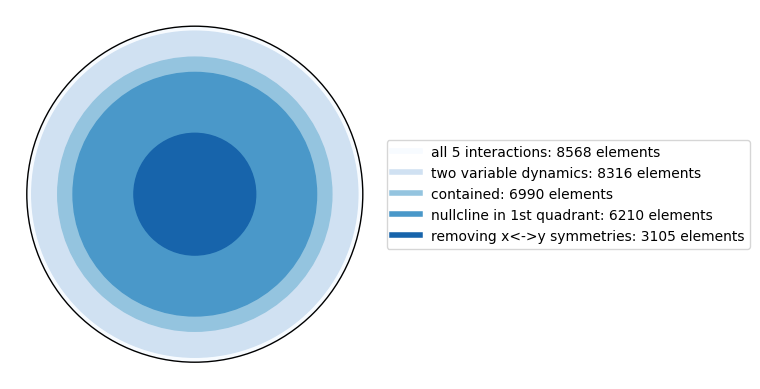

In [24]:
import numpy as np
filtering_conds = ['one variable dynamics',['x to cc','y to cc'], 'no nullcline in 1st quadrant','symmetric combination']
lengths = np.zeros(len(filtering_conds)+1)

lengths[0] = df['number combinations'].sum()
df_remain = df
print(df.to_string())
for i,cond in enumerate(filtering_conds):
    print(cond)
    if type(cond)==str:
        df_remain = df_remain[~df_remain['remarks'].str.contains(cond, case=False, na=False)]
    else:
        for st in cond:
            df_remain = df_remain[~df_remain['remarks'].str.contains(st, case=False, na=False)]
    lengths[i+1] = df_remain['number combinations'].sum()
    print(df_remain.to_string())
labels = ['all 5 interactions','two variable dynamics','contained','nullcline in 1st quadrant','removing x<->y symmetries']
import sys
import os
base_utils_path = os.path.abspath(os.path.join(os.path.dirname(os.getcwd()), 'Base'))
if base_utils_path not in sys.path:
    sys.path.append(base_utils_path)
from utils import draw_filtration_circles

fig,axs = draw_filtration_circles(lengths,labels,outline=True)
fig.savefig('figures/venn_diagram_initial.png',dpi=200,bbox_inches = 'tight')
print(lengths)

In [25]:
from utils import generate_combinations
prod_x = prod_y = ['1','x','y']
rem_x = rem_y = ['1','x','y','x*y','x^2','y^2']
lists = [prod_x,rem_x,prod_y,rem_y]
df_all = pd.DataFrame()
for i in range(len(df)):
    if df.iloc[i]['remarks']!='':
        df_curr = generate_combinations(lists,[df.iloc[i]['prod x'],  df.iloc[i]['rem x'],  df.iloc[i]['prod y'],  df.iloc[i]['rem y']],['prod_x','rem_x','prod_y','rem_y'])
        df_curr['remarks'] = df.iloc[i]['remarks']
        df_all = pd.concat([df_all,df_curr], axis=0, join='outer', ignore_index=True)
df_all

rem_y_item_1 rem_y_item_2 rem_y_item_3 rem_y_item_4 rem_y_item_5  \
0               1            x            y          x*y          x^2   
1               1            x            y          x*y          y^2   
2               1            x            y          x^2          y^2   
3               1            x          x*y          x^2          y^2   
4               1            y          x*y          x^2          y^2   
...           ...          ...          ...          ...          ...   
5458          NaN          NaN          NaN          NaN          NaN   
5459          NaN          NaN          NaN          NaN          NaN   
5460          NaN          NaN          NaN          NaN          NaN   
5461          NaN          NaN          NaN          NaN          NaN   
5462          NaN          NaN          NaN          NaN          NaN   

                    remarks prod_y_item_1 prod_y_item_2 prod_y_item_3  \
0     one variable dynamics           NaN           NaN           NaN   
1     one variable dynamics           NaN           NaN           NaN   
2     one variable dynamics           NaN           NaN           NaN   
3     one variable dynamics           NaN           NaN           NaN   
4     one variable dynamics           NaN           NaN           NaN   
...                     ...           ...           ...           ...   
5458  one variable dynamics           NaN           NaN           NaN   
5459  one variable dynamics           NaN           NaN           NaN   
5460  one variable dynamics           NaN           NaN           NaN   
5461  one variable dynamics           NaN           NaN           NaN   
5462  one variable dynamics           NaN           NaN           NaN   

     rem_x_item_1 rem_x_item_2 rem_x_item_3 rem_x_item_4 rem_x_item_5  \
0             NaN          NaN          NaN          NaN          NaN   
1             NaN          NaN          NaN          NaN          NaN   
2             NaN          NaN          NaN          NaN          NaN   
3             NaN          NaN          NaN          NaN          NaN   
4             NaN          NaN          NaN          NaN          NaN   
...           ...          ...          ...          ...          ...   
5458            y          x^2          NaN          NaN          NaN   
5459            y          y^2          NaN          NaN          NaN   
5460          x*y          x^2          NaN          NaN          NaN   
5461          x*y          y^2          NaN          NaN          NaN   
5462          x^2          y^2          NaN          NaN          NaN   

     prod_x_item_1 prod_x_item_2 prod_x_item_3  
0              NaN           NaN           NaN  
1              NaN           NaN           NaN  
2              NaN           NaN           NaN  
3              NaN           NaN           NaN  
4              NaN           NaN           NaN  
...            ...           ...           ...  
5458             1             x             y  
5459             1             x             y  
5460             1             x             y  
5461             1             x             y  
5462             1             x             y  

[5463 rows x 17 columns]

In [26]:
import pandas as pd

# Assuming df1, df2, df3, and df4 are your existing dataframes
df_names = [f'row{i}.csv' for i in range(1,9)]
dfs = [pd.read_csv(df_name) for df_name in df_names]+[df_all]
# Step 1: Merge the dataframes using an outer join to ensure all columns are included
merged_df = pd.concat(dfs, axis=0, join='outer', ignore_index=True)

# Concatenate 'remarks' while handling multiple remarks columns
merged_df['remarks'] = merged_df['remarks'].fillna('').astype(str)

# Step 3: Combine remarks columns across the original dataframes
merged_df['remarks'] = merged_df.groupby(merged_df.index)['remarks'].transform(lambda x: ' '.join(filter(None, x)))

# Drop duplicate rows that may have been formed during concatenation
merged_df = merged_df.drop_duplicates()

column_order = ['prod_x_item_1', 'prod_x_item_2','prod_x_item_3', 'rem_x_item_1', 'rem_x_item_2','rem_x_item_3', 
                'prod_y_item_1', 'rem_y_item_1', 'rem_y_item_2','rem_y_item_3', 'remarks','parameter_range']

# Reorder the dataframe
merged_df = merged_df[column_order]

# Display the rearranged dataframe
print(merged_df.to_string())
merged_df.to_csv('df_5_interactions.csv')

     prod_x_item_1 prod_x_item_2 prod_x_item_3 rem_x_item_1 rem_x_item_2 rem_x_item_3 prod_y_item_1 rem_y_item_1 rem_y_item_2 rem_y_item_3                                                                                                                   remarks                              parameter_range
0                1           NaN           NaN            1          NaN          NaN           NaN            1            x            y                                                                    zero behaviour of x at origin,no feedback,no feedback,                                          NaN
1                1           NaN           NaN            1          NaN          NaN           NaN            1            x          x*y                                                                    zero behaviour of x at origin,no feedback,no feedback,                                          NaN
2                1           NaN           NaN            1          NaN          

[8568. 8466. 7305. 6722. 6309. 5587. 5559.]


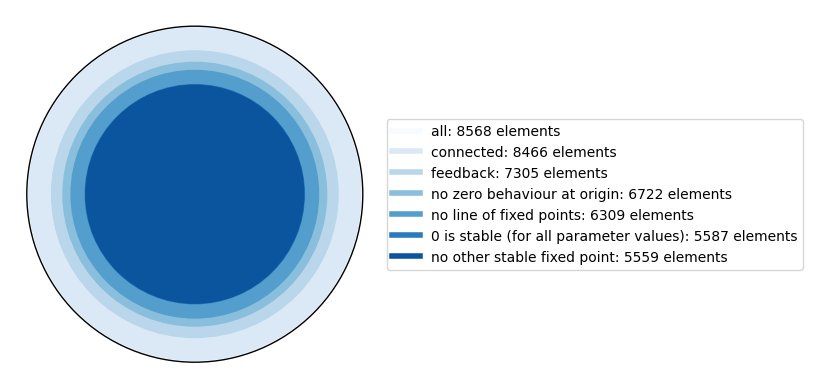

In [27]:
remarks = ['not connected','no feedback','zero behaviour','line of fixed points','0 is not stable','another stable fp at all parameter values']
lengths2 = np.zeros(len(remarks)+1)
df = merged_df
lengths2[0] = len(df)
df_remain = df
for i,remark in enumerate(remarks):
    df_remain = df_remain[~df_remain['remarks'].str.contains(remark, case=False, na=False)]
    lengths2[i+1] = len(df_remain)
print(lengths2)
from utils import draw_filtration_circles
labels2 = ['all','connected','feedback','no zero behaviour at origin','no line of fixed points','0 is stable (for all parameter values)','no other stable fixed point']
fig,ax = draw_filtration_circles(lengths2,labels2,True,cmap = 'Blues')
#fig.savefig('figures/row3/venn_diagram.png',dpi=200,bbox_inches='tight')

[8568. 8316. 6990. 6210. 3105. 8466. 7305. 6722. 6309. 5587. 5559.]
11
['all 5 interactions', 'two variable dynamics', 'contained', 'nullcline in 1st quadrant', 'removing x<->y symmetries', 'connected', 'feedback', 'no zero behaviour at origin', 'no line of fixed points', '0 is stable (for all parameter values)', 'no other stable fixed point']
11


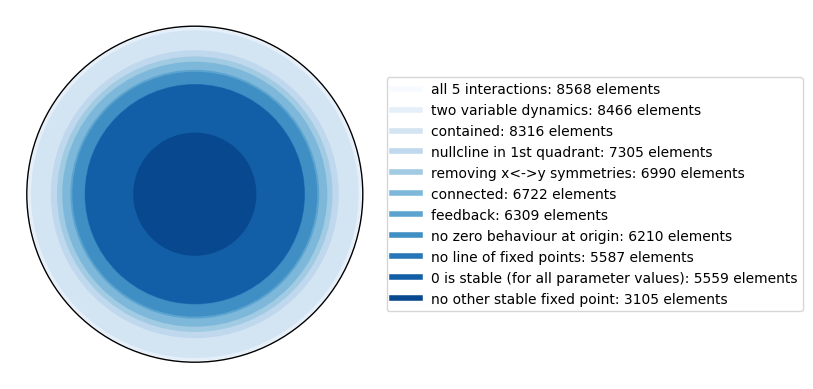

In [28]:
lengths_all = np.concatenate([lengths,lengths2[1:]])
print(lengths_all)
print(len(lengths_all))
labels_all = labels+labels2[1:]
print(labels_all)
print(len(labels_all))
fig,ax = draw_filtration_circles(lengths_all,labels_all,True,cmap = 'Blues')
fig.savefig('figures/venn_diagram_all.png',dpi=200,bbox_inches='tight')

In [29]:
from Base.Combo_CC_Base import Combo_CC
cms_remain = []
counter = 0
pars_dicts = []
xlims = []
ylims = []
df = merged_df
for i in range(len(df)):
    if df.iloc[i]['remarks']=='':
        prod_x = df.iloc[i][['prod_x_item_1','prod_x_item_2','prod_x_item_3']].dropna().values
        rem_x = df.iloc[i][['rem_x_item_1','rem_x_item_2','rem_x_item_3']].dropna().values
        prod_y = df.iloc[i][['prod_y_item_1']].dropna().values
        rem_y = df.iloc[i][['rem_y_item_1','rem_y_item_2','rem_y_item_3']].dropna().values

        cm = Combo_CC(prod_x,rem_x,prod_y,rem_y,parameter_placement='x')
        #print(f'{counter} dx/dt = {cm.P}, dy/dt = {cm.Q}')
        counter +=1
        cms_remain.append(cm)
        if pd.isna(df.iloc[i]['parameter_range']):
            pars_dict = {'dp0':2,'dp1':1}
            xlims.append([-0.1,5])
            ylims.append([-0.1,5])
        else:
            if df.iloc[i]['parameter_range'] == 'dp0<1':
                pars_dict = {'dp0':0.5,'dp1':2}
                xlims.append([-0.1,2])
                ylims.append([-0.1,10])
            elif df.iloc[i]['parameter_range'] ==  'dp1>C_y*dp0':
                pars_dict = {'dp0':0.01,'dp1':2}
                xlims.append([-0.1,2])
                ylims.append([-0.1,5])
            else:
                pars_dict = {'dp0':6.35,'dp1':10}
                xlims.append([-0.1,2])
                ylims.append([-0.1,5])
        pars_dicts.append(pars_dict)

indxs_to_plot = [0,18,27,36,45,54,55,56,57,58,59]
cms_to_plot = [cms_remain[i] for i in indxs_to_plot]
pars_dicts_to_plot = [pars_dicts[i] for i in indxs_to_plot]
xlims_to_plot = [xlims[i] for i in indxs_to_plot]
ylims_to_plot = [ylims[i] for i in indxs_to_plot]

In [30]:
arr2 = indxs_to_plot+[len(cms_remain)]
multiplicites = [arr2[i]-arr2[i-1] for i in range(1,len(arr2))]


plotting combo 1/11
plotting combo 2/11
plotting combo 3/11
plotting combo 4/11
plotting combo 5/11
plotting combo 6/11
plotting combo 7/11
plotting combo 8/11
plotting combo 9/11
plotting combo 10/11
plotting combo 11/11


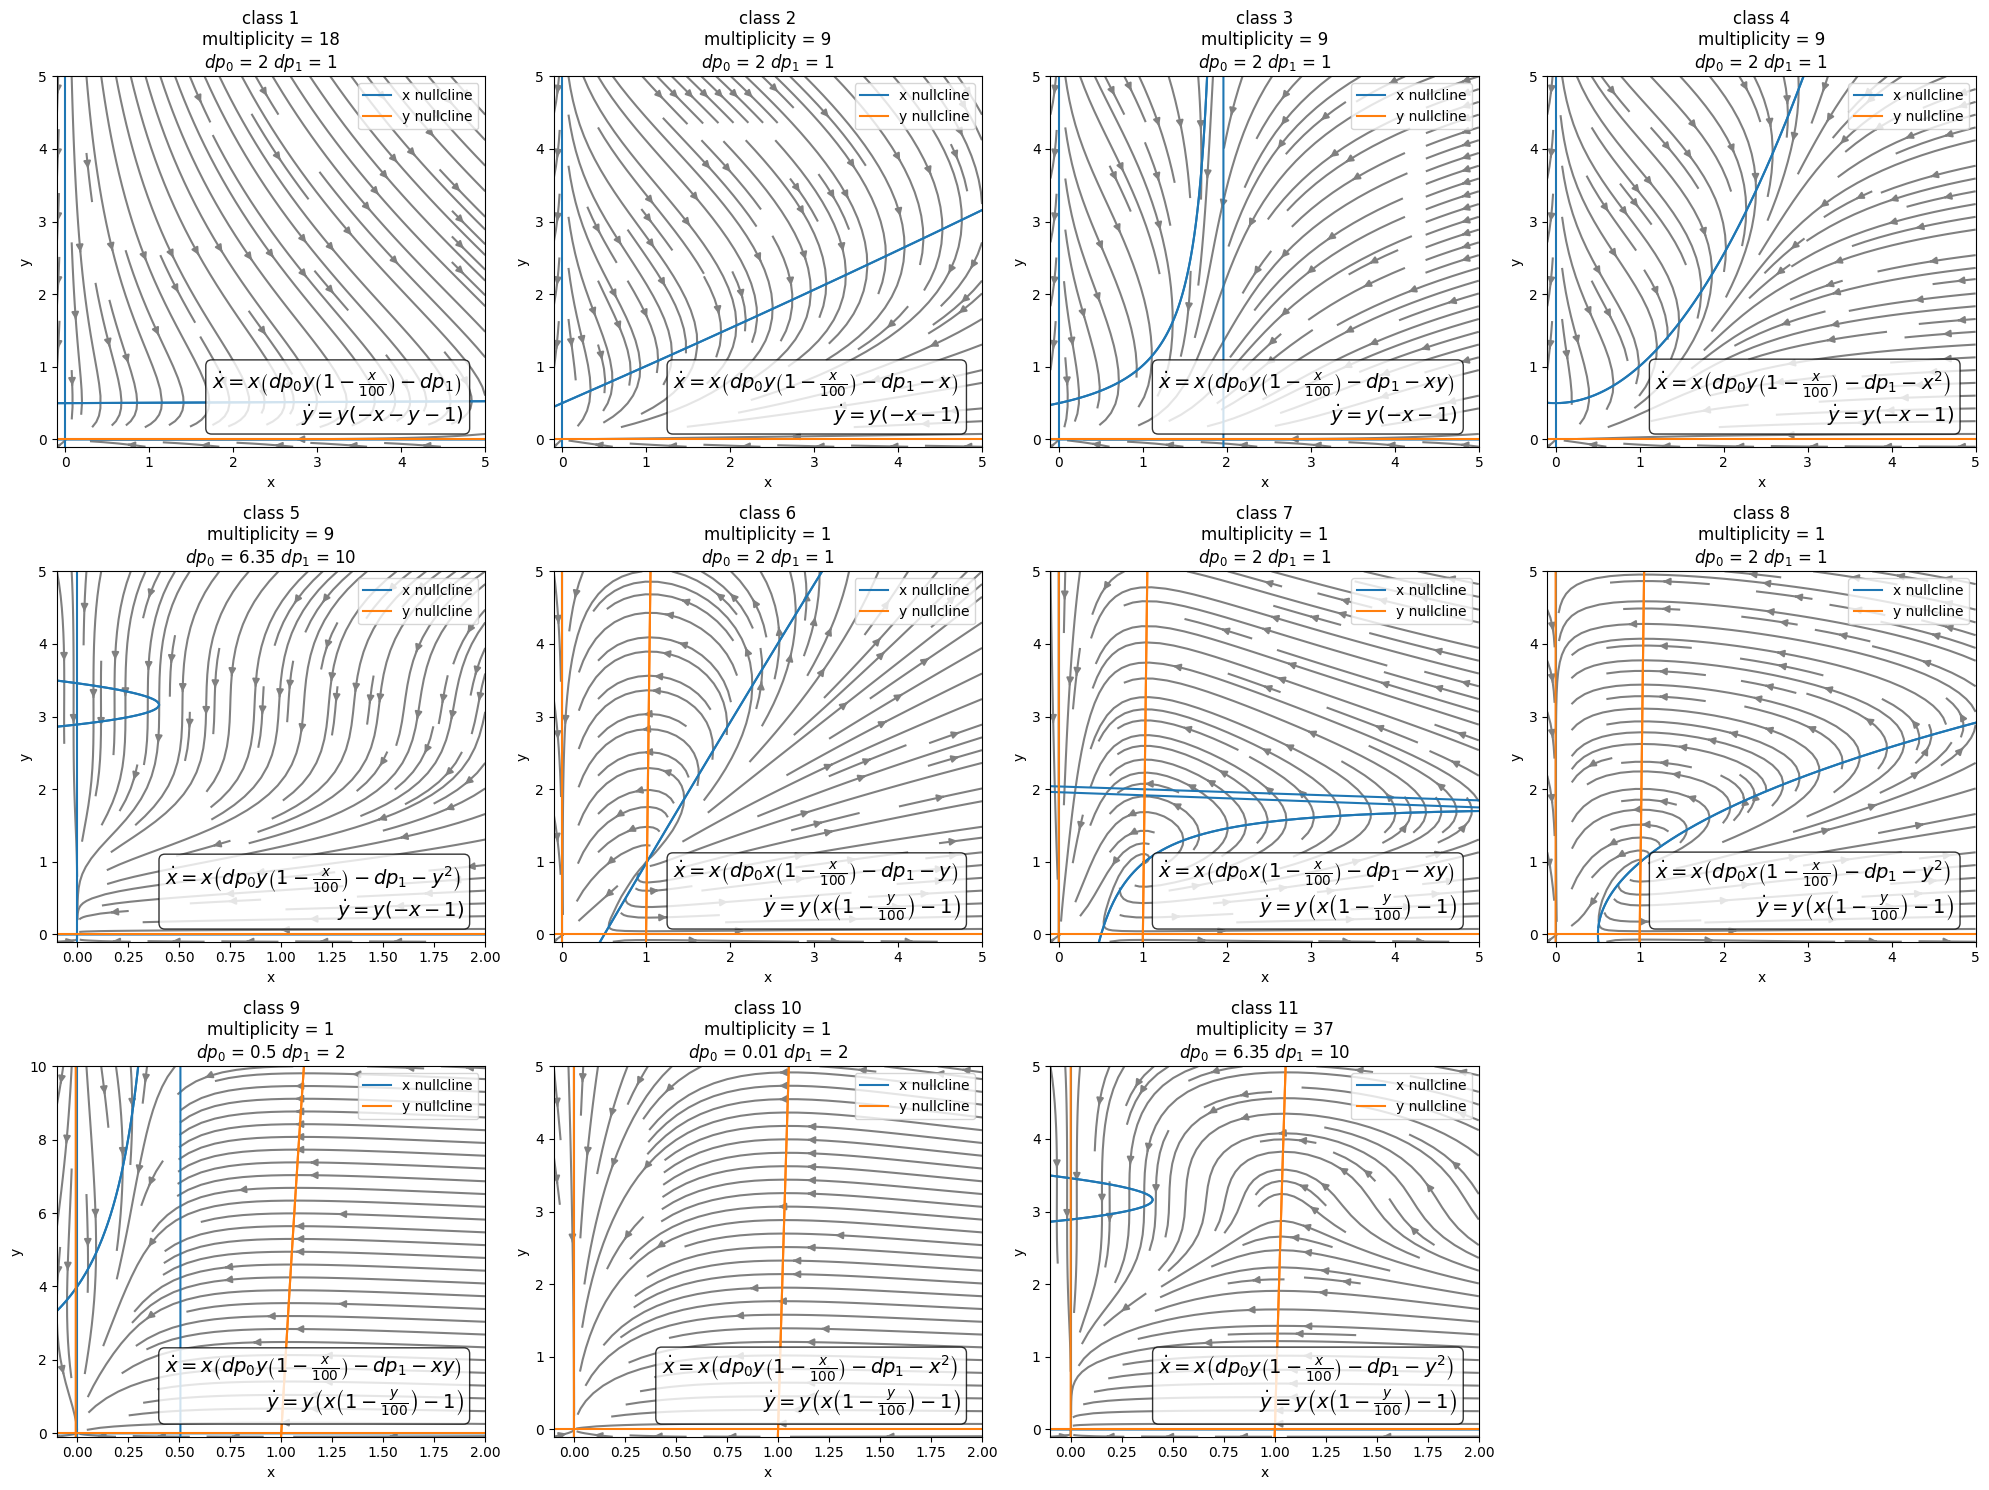

In [31]:
from utils import draw_combos_phase_portraits
ncols = 4
fig,axs = draw_combos_phase_portraits(cms_to_plot,pars_dicts_to_plot,ncols,True,5,5,xlims_to_plot,ylims_to_plot)
for i in range(len(axs.flatten())):
    if i<len(cms_to_plot):
        axs[int(i/ncols),i%ncols].set_title(f'class {i+1}\nmultiplicity = {multiplicites[i]}\n$dp_0$ = {pars_dicts_to_plot[i]["dp0"]} $dp_1$ = {pars_dicts_to_plot[i]["dp1"]}')
    else:
        axs[int(i/ncols),i%ncols].set_axis_off()

fig.tight_layout()
fig.savefig('figures/combos_remain_zoom_in_in_zero.png',dpi=200)

In [32]:
from utils import draw_circuit_from_cm
import matplotlib.pyplot as plt
classes = []
for i in range(len(multiplicites)):
    for j in range(multiplicites[i]):
        classes.append(i+1)


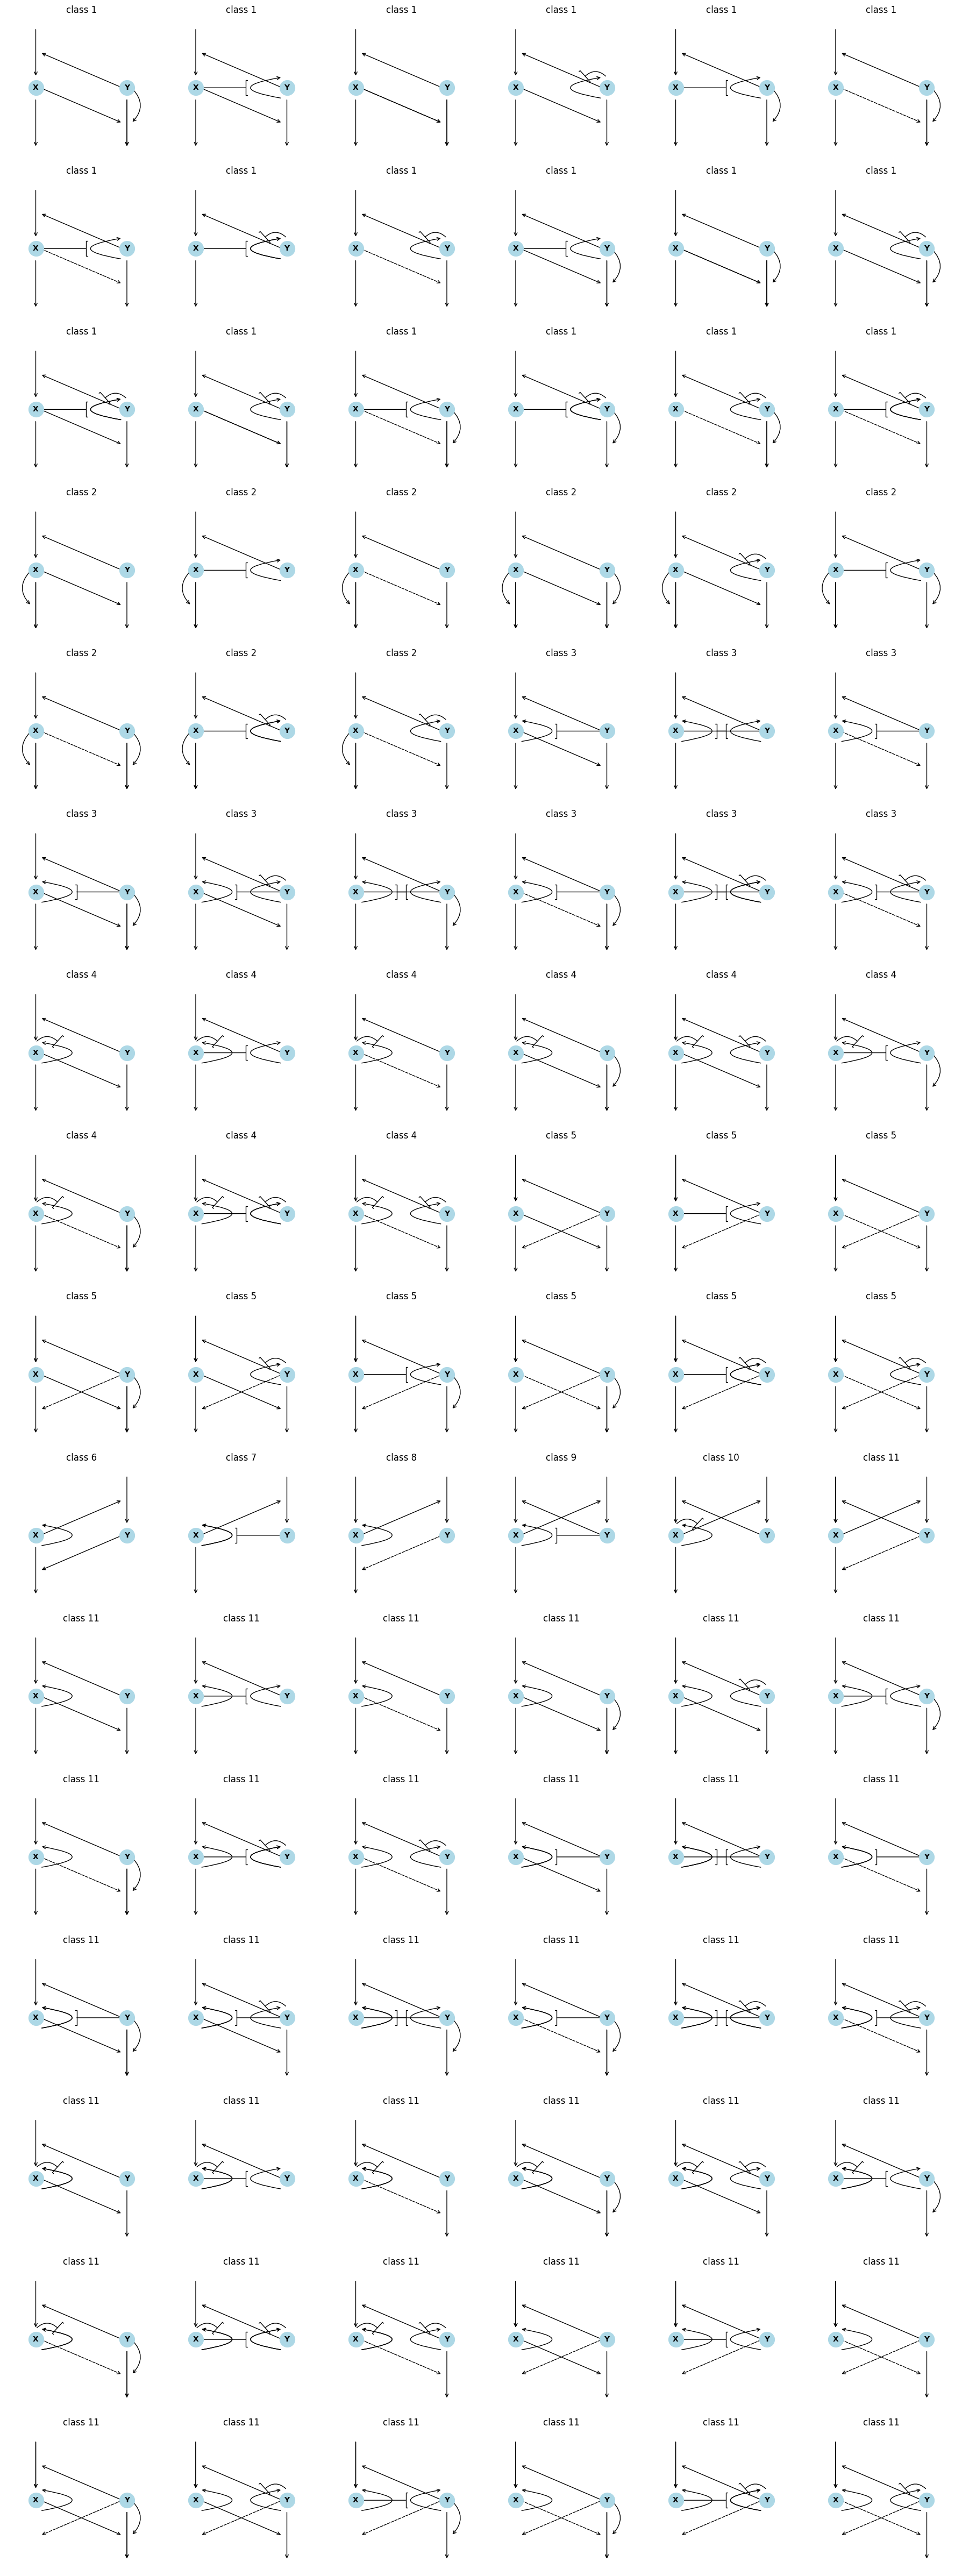

In [33]:
ncols = 6
import math
nrows = math.ceil(len(cms_remain)/ncols)
fig,axs = plt.subplots(nrows = nrows, ncols = ncols, figsize = (int(3*ncols),int(3*nrows)))
for i,cm in enumerate(cms_remain):
    draw_circuit_from_cm(cm,fig =fig, ax = axs[int(i/ncols),i%ncols],xlim = [-1,4])
    axs[int(i/ncols),i%ncols].set_title(f'class {classes[i]}')
for i in range(len(cms_remain),len(axs.flatten())):
    axs[int(i/ncols),i%ncols].set_axis_off()
fig.tight_layout()
fig.savefig('figures/circuits_remain.png')

In [34]:
for i,cm in enumerate(cms_remain):
    print(f'{classes[i]} dx/dt = {cm.P} dy/dt = {cm.Q}')

1 dx/dt = x*(dp0*y*(1 - x/100) - dp1) dy/dt = y*(-x - y - 1)
1 dx/dt = x*(dp0*y*(1 - x/100) - dp1) dy/dt = y*(-x*y - x - 1)
1 dx/dt = x*(dp0*y*(1 - x/100) - dp1) dy/dt = y*(-x**2 - x - 1)
1 dx/dt = x*(dp0*y*(1 - x/100) - dp1) dy/dt = y*(-x - y**2 - 1)
1 dx/dt = x*(dp0*y*(1 - x/100) - dp1) dy/dt = y*(-x*y - y - 1)
1 dx/dt = x*(dp0*y*(1 - x/100) - dp1) dy/dt = y*(-x**2 - y - 1)
1 dx/dt = x*(dp0*y*(1 - x/100) - dp1) dy/dt = y*(-x**2 - x*y - 1)
1 dx/dt = x*(dp0*y*(1 - x/100) - dp1) dy/dt = y*(-x*y - y**2 - 1)
1 dx/dt = x*(dp0*y*(1 - x/100) - dp1) dy/dt = y*(-x**2 - y**2 - 1)
1 dx/dt = x*(dp0*y*(1 - x/100) - dp1) dy/dt = y*(-x*y - x - y)
1 dx/dt = x*(dp0*y*(1 - x/100) - dp1) dy/dt = y*(-x**2 - x - y)
1 dx/dt = x*(dp0*y*(1 - x/100) - dp1) dy/dt = y*(-x - y**2 - y)
1 dx/dt = x*(dp0*y*(1 - x/100) - dp1) dy/dt = y*(-x*y - x - y**2)
1 dx/dt = x*(dp0*y*(1 - x/100) - dp1) dy/dt = y*(-x**2 - x - y**2)
1 dx/dt = x*(dp0*y*(1 - x/100) - dp1) dy/dt = y*(-x**2 - x*y - y)
1 dx/dt = x*(dp0*y*(1 - x/100) -